In [ ]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/Skillnest/ML/CORES/dataset2.csv"
df = pd.read_csv(path)

In [ ]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Verificar valores nulos
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# Porcentaje de nulos por columna
porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100

# Mostrar en forma de tabla
porcentaje_nulos = porcentaje_nulos.round(2).reset_index()
porcentaje_nulos.columns = ["Columna", "Porcentaje de Nulos"]
porcentaje_nulos

,Columna,Porcentaje de Nulos
0,Year,1.63
1,Publisher,0.35
2,Rank,0.00
3,Platform,0.00
4,Name,0.00
5,Genre,0.00
6,NA_Sales,0.00
7,EU_Sales,0.00
8,JP_Sales,0.00
9,Other_Sales,0.00


In [ ]:
# Tipo de datos por columna
df.dtypes.value_counts()

,count
float64,6
object,4
int64,1


In [ ]:
# Cantidad de valores unicos por columna
print("\nCantidad de valores únicos por columna:")
print(df.nunique())



Cantidad de valores únicos por columna:
Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [ ]:
# Verificar filas duplicadas
df.duplicated().sum()

np.int64(0)

no existen duplicados pero si valores nulos.

In [ ]:
# Descripción de variables numéricas
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.61,4791.85,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.41,5.83,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.26,0.82,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.15,0.51,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.05,0.19,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.54,1.56,0.01,0.06,0.17,0.47,82.74


Análisis Estadístico Descriptivo de Variables Numéricas
Rank
Media: 8300.61, lo que indica un ranking promedio hacia la mitad del listado (rango de 1 a 16,600).
Desviación estándar: 4791.85, mostrando gran dispersión en las posiciones.
Rango: de 1 (mejor posición) a 16,600 (peor posición).
El ranking cubre todo el espectro, con una distribución uniforme en términos generales.

Year (Año de lanzamiento)
Media: 2006.41, mediana: 2007.
Rango: desde 1980 hasta 2020.
Desviación estándar: 5.83 años.
La mayoría de los videojuegos en el dataset son lanzamientos relativamente recientes, principalmente desde principios de los 2000 en adelante. Algunos valores faltantes podrían afectar el análisis.

Ventas regionales y globales (millones de unidades vendidas)
NA_Sales (Norteamérica)
Media: 0.26, mediana: 0.08.
Máximo: 41.49 (un juego muy exitoso).

EU_Sales (Europa)
Media: 0.15, mediana: 0.02.
Máximo: 29.02.


JP_Sales (Japón)
Media: 0.08, mediana: 0.00.
Máximo: 10.22.
Muchas ventas cercanas a cero, indicando que muchos juegos no venden o venden poco en Japón.

Other_Sales (Otros mercados)
Media: 0.05, mediana: 0.01.
Máximo: 10.57.
Similar patrón de ventas bajas para la mayoría.

Global_Sales (Total mundial)
Media: 0.54, mediana: 0.17.
Máximo: 82.74 (un gran éxito global).




In [ ]:
# Descripción de variables categóricas
df.describe(include="object")

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


Análisis de Variables Categóricas
Name (Nombre del videojuego)
Total de valores únicos: 11,493.
más frecuente: "Need for Speed: Most Wanted", que aparece 12 veces.
Hay una gran variedad de juegos en el dataset, con muy pocos títulos repetidos. El juego más repetido se lanzó en múltiples plataformas o versiones.

Platform (Plataforma)
Total de categorías únicas: 31 plataformas diferentes.
Plataforma más frecuente: DS con 2,163 registros.
El dataset incluye una amplia diversidad de plataformas, con predominio claro de la Nintendo DS. Esto puede influir en las ventas y en el tipo de juegos populares.

Genre (Género)
Total de géneros únicos: 12.
Género más frecuente: Action con 3,316 registros.
El género de acción es el más popular en este dataset, concentrando casi un quinto de los juegos. Los demás géneros están menos representados.

Publisher (Publicadora)
Total de editoriales únicas: 578.
Publicadora más frecuente: Electronic Arts con 1,351 juegos publicados.
Hay muchas empresas publicadoras, pero Electronic Arts domina el mercado en este dataset, con aproximadamente el 8% de los títulos.

In [ ]:
# Gráfico Pie Chart para distribucion de genre
fig = px.pie(
    df,
    names="Genre",
    title="Distribución de videojuegos por género",
    hole=0.3
)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title_font_size=18)
fig.show()

El género Action es el predominante con un 20%

Otros géneros como Sports, Shooter, y Role-Playing también tienen una presencia significativa, pero menor.

Los géneros restantes están distribuidos en proporciones más pequeñas, indicando una amplia variedad de estilos de juego.

In [ ]:
# Histograma de la distribución de los años de lanzamiento (Year) segmentada por plataforma (Platform).
fig = px.histogram(
    df,
    x="Year",
    color="Platform",
    nbins=20,
    title="Distribución de Año de Lanzamiento por Plataforma"
)
fig.update_layout(bargap=0.1, title_font_size=18)
fig.show()

El histograma muestra cómo se distribuyen los años de lanzamiento de los videojuegos agrupados por plataforma.

Algunas plataformas tienen más juegos lanzados en ciertos periodos.

La diversidad en las barras de colores indica una amplia variedad de plataformas activas durante las últimas décadas.

In [ ]:
# Box plot de la distribución de ventas globales (Global_Sales) por género (Genre)
fig = px.box(
    df,
    x="Genre",
    y="Global_Sales",
    color="Genre",
    title="Distribución de Ventas Globales por Género de Videojuego",
    points="all"  # Muestra todos los puntos para visualizar outliers
)
fig.update_layout(title_font_size=18)
fig.show()

El boxplot muestra la dispersión de las ventas globales para cada género de videojuego.

Se puede observar que la mayoría de los juegos tienen ventas bajas, pero hay algunos títulos que destacan con ventas muy altas (outliers) en casi todos los géneros.

Los outliers evidencian juegos que tuvieron un éxito comercial significativo, muy por encima del promedio del género.

In [ ]:
#  Análisis de correlación y mapa de calor

# Para calcular la matriz de correlación, necesito solo las variables númericas, entonces las separare a continuación

cols_numericas = ["Rank", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

df_numeric = df[cols_numericas]

In [ ]:
# Calcular matriz de correlación con método Pearson

correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


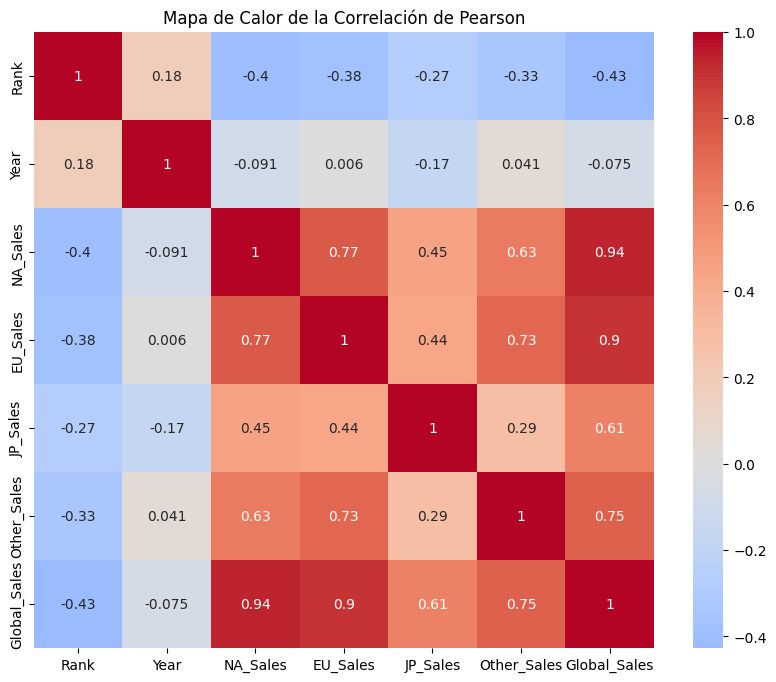

In [ ]:
# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

Resumen de Hallazgos
El dataset contiene 11 variables, de las cuales 7 son numéricas y 4 categóricas.

Se detectaron valores nulos en 2 variables: principalmente en la columna Year (algunos años faltantes) y en Publisher (algunos datos faltantes).

Las variables con mayor presencia de outliers son las ventas regionales y globales (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales), debido a la alta concentración de juegos con ventas muy bajas y unos pocos con ventas extremadamente altas.

Las correlaciones más fuertes se observaron entre las ventas regionales y las ventas globales, especialmente entre NA_Sales y Global_Sales, y entre EU_Sales y Global_Sales.

Se identificaron desafíos importantes como:

Valores faltantes en variables clave, lo que podría afectar los análisis posteriores.

Distribución altamente sesgada y con outliers, lo que requiere técnicas de tratamiento de datos para evitar que modelos predictivos se vean sesgados.

